In [13]:
import numpy as np
import matplotlib.pyplot as plt
import keras as ke
from keras import layers as lr


In [14]:
def mygenerator():
    gModel=ke.models.Sequential()
    
    gModel.add(lr.Dense(units=256,input_dim=100))
    gModel.add(lr.LeakyReLU(0.3))
    gModel.add(lr.Dense(units=512))
    gModel.add(lr.LeakyReLU(0.3))
    gModel.add(lr.Dense(units=1024))
    gModel.add(lr.LeakyReLU(0.2))
    
    gModel.add(lr.Dense(units=784, activation='tanh'))
    
    gModel.compile(loss='binary_crossentropy', optimizer=ke.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
    return gModel

In [15]:
def mydiscriminator():
    dModel=ke.models.Sequential()

    dModel.add(lr.Dense(1024,input_dim=784))
    dModel.add(lr.LeakyReLU(0.2))
    dModel.add(lr.Dropout(0.3))   
    dModel.add(lr.Dense(512))
    dModel.add(lr.LeakyReLU(0.2))
    dModel.add(lr.Dropout(0.3))
    dModel.add(lr.Dense(256))
    dModel.add(lr.LeakyReLU(0.3))
    dModel.add(lr.Dropout(0.3))
    dModel.add(lr.Dense(128))
    dModel.add(lr.LeakyReLU(0.3))
    
    dModel.add(lr.Dense(1, activation='sigmoid'))
    
    dModel.compile(loss='binary_crossentropy', optimizer=ke.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
    return dModel

In [16]:

g=mygenerator()
d=mydiscriminator()

d.trainable = False
inputs = lr.Input(shape=(100, ))
temp = g(inputs)
outputs = d(temp)
final = ke.models.Model(inputs, outputs)

final.compile(loss='binary_crossentropy', optimizer=ke.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])
final.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_4 (Sequential)   (None, 784)               1486352   
                                                                 
 sequential_5 (Sequential)   (None, 1)                 1492993   
                                                                 
Total params: 2979345 (11.37 MB)
Trainable params: 1486352 (5.67 MB)
Non-trainable params: 1492993 (5.70 MB)
_________________________________________________________________


In [17]:

(x_train, y_train), (x_test, y_test) = ke.datasets.mnist.load_data()
x_train = x_train.astype('float32')/255
# flatten images 
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[1])


4/4 [==============================] - 0s 2ms/step
Generator performance at stage 0
4/4 [==============================] - 0s 2ms/step
Generator performance at stage 10
4/4 [==============================] - 0s 2ms/step
Generator performance at stage 20
4/4 [==============================] - 0s 3ms/step
Generator performance at stage 30
4/4 [==============================] - 0s 3ms/step
Generator performance at stage 40
4/4 [==============================] - 0s 3ms/step
Generator performance at stage 50
4/4 [==============================] - 0s 3ms/step
Generator performance at stage 60
4/4 [==============================] - 0s 3ms/step
Generator performance at stage 70
4/4 [==============================] - 0s 3ms/step
Generator performance at stage 80
4/4 [==============================] - 0s 3ms/step
Generator performance at stage 90
4/4 [==============================] - 0s 2ms/step


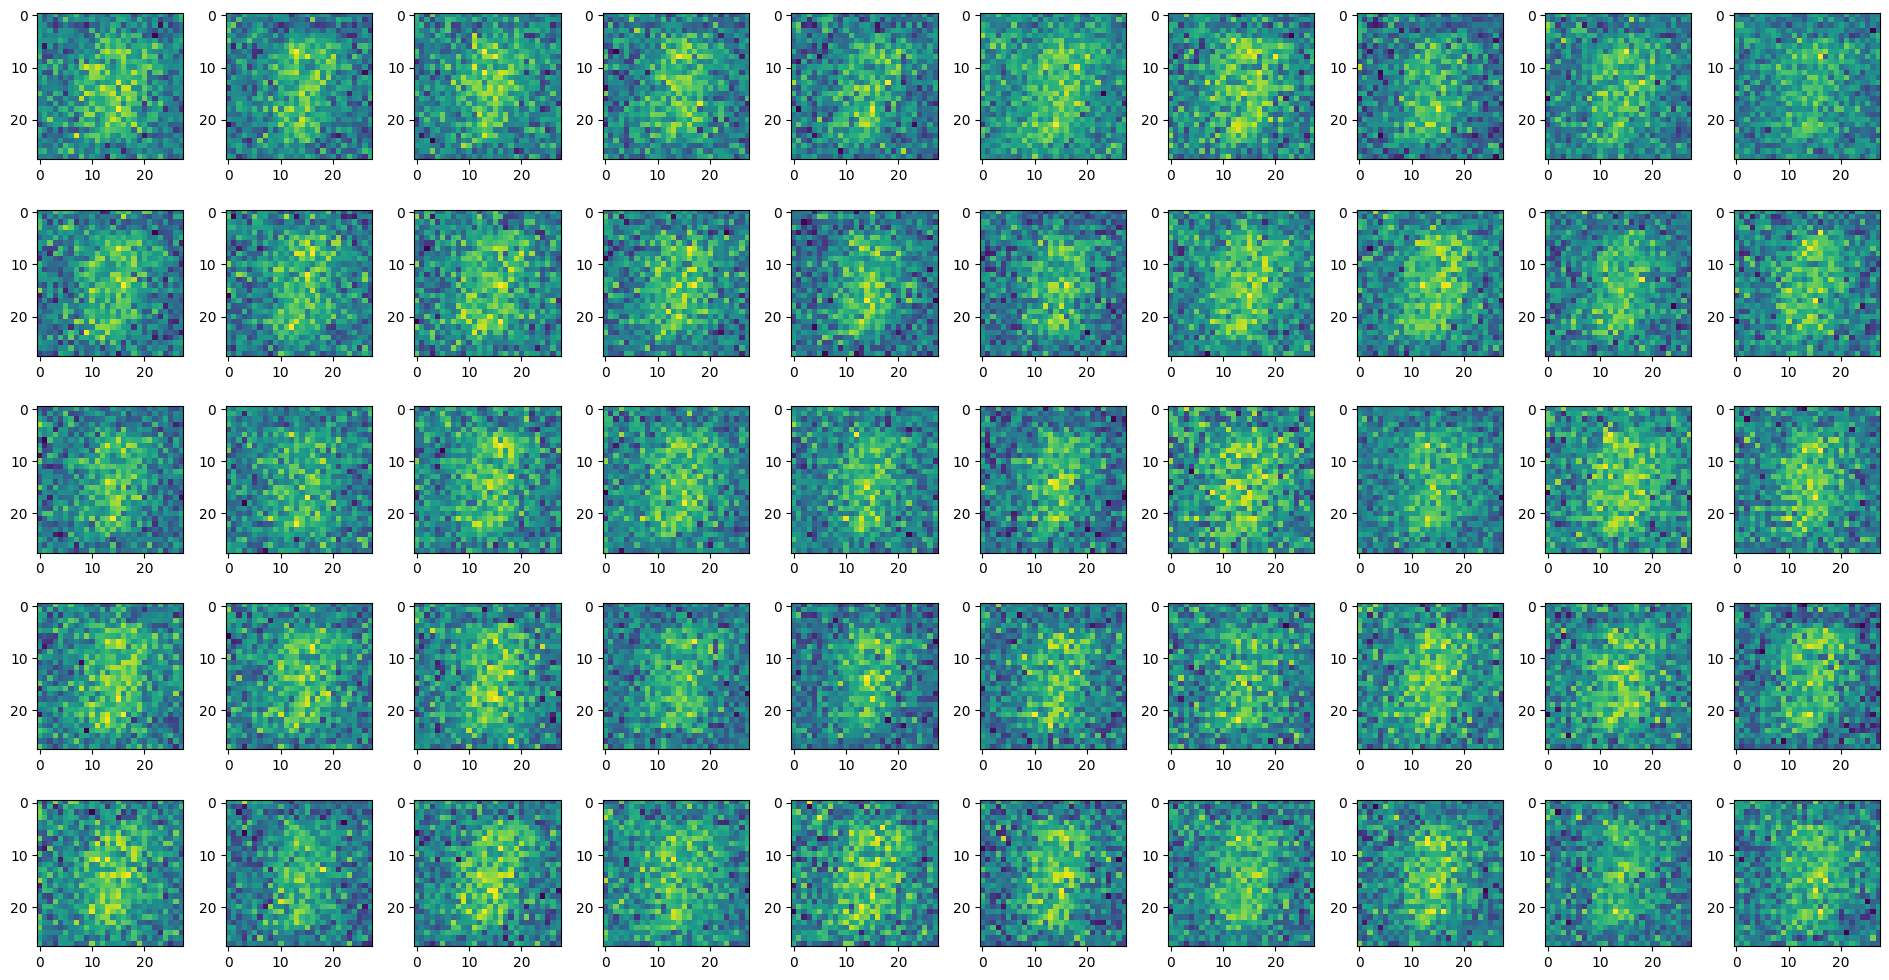

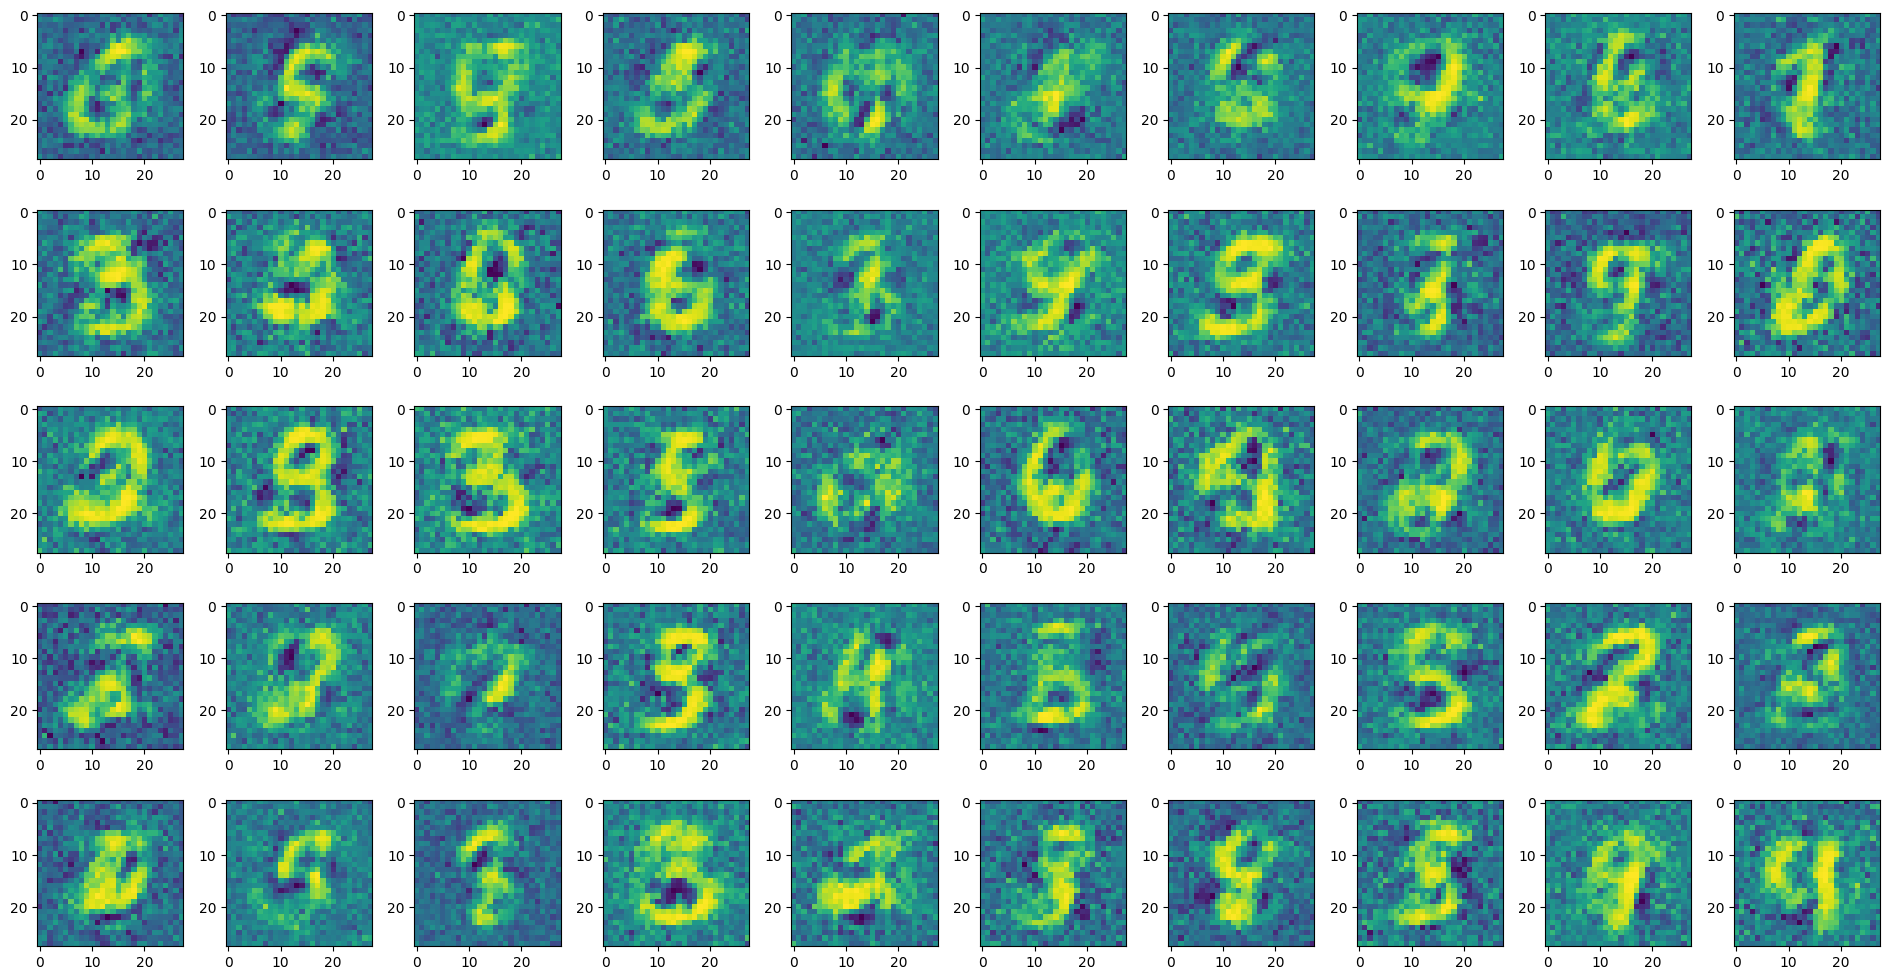

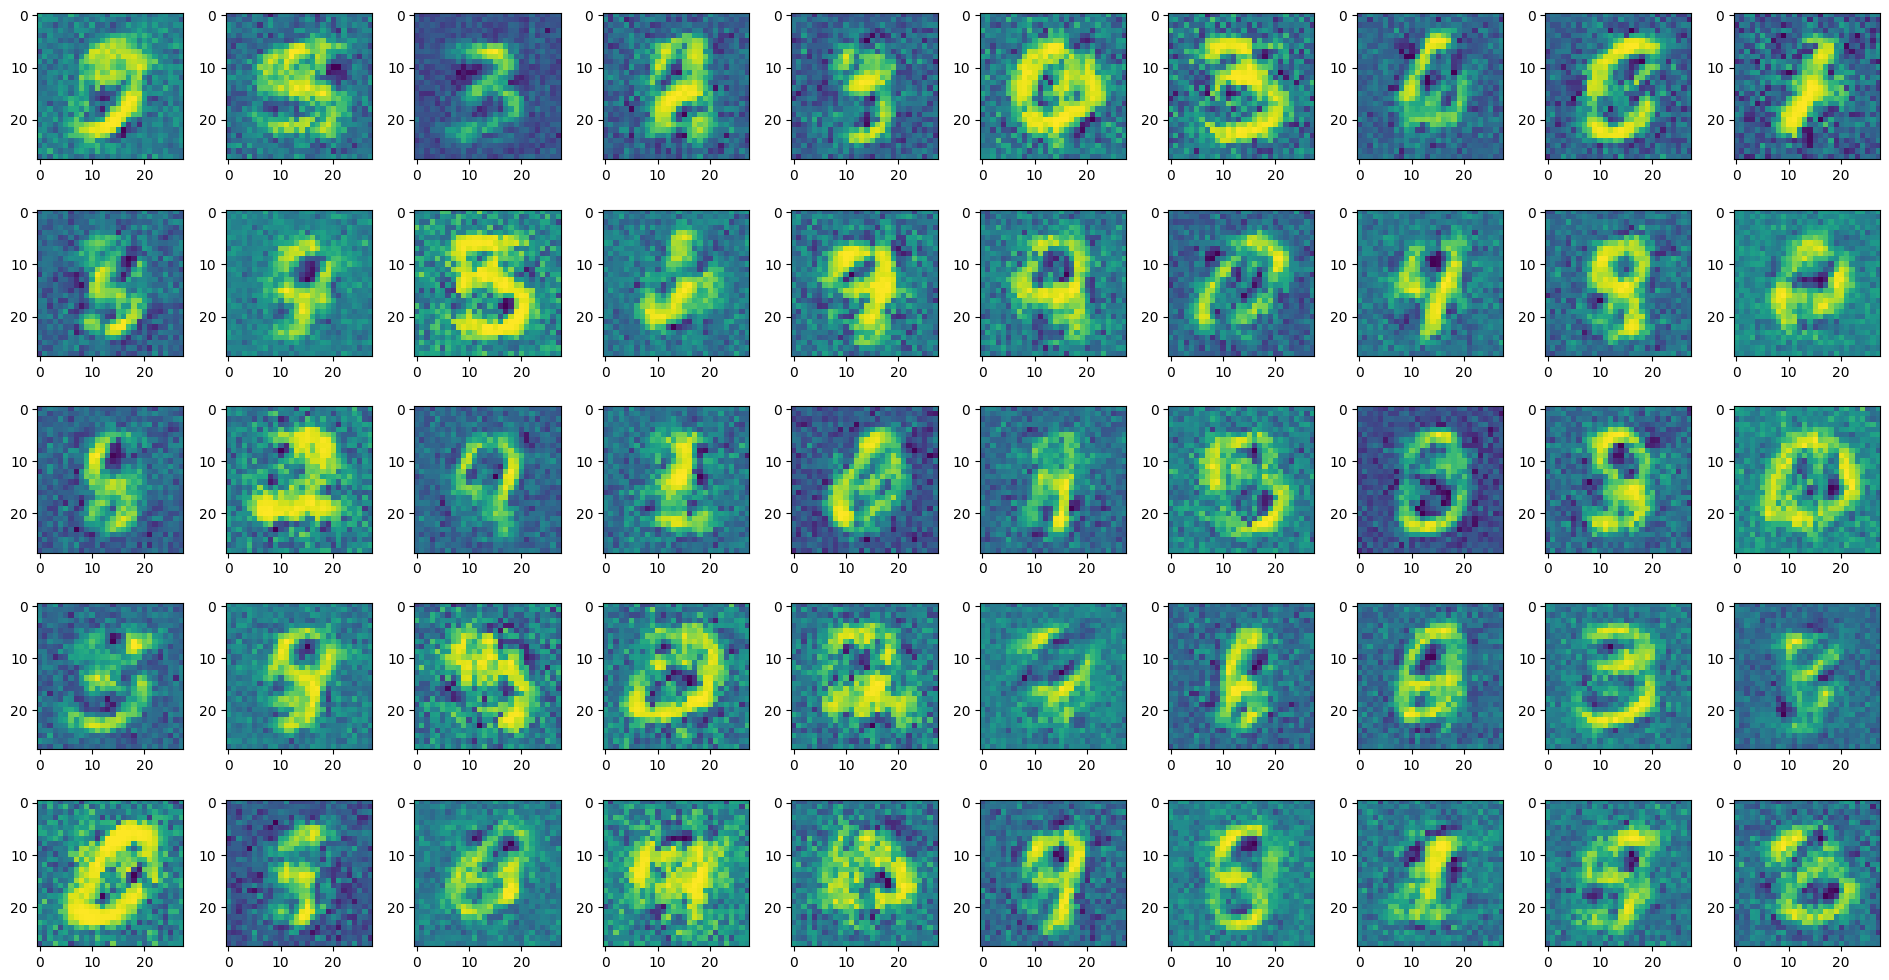

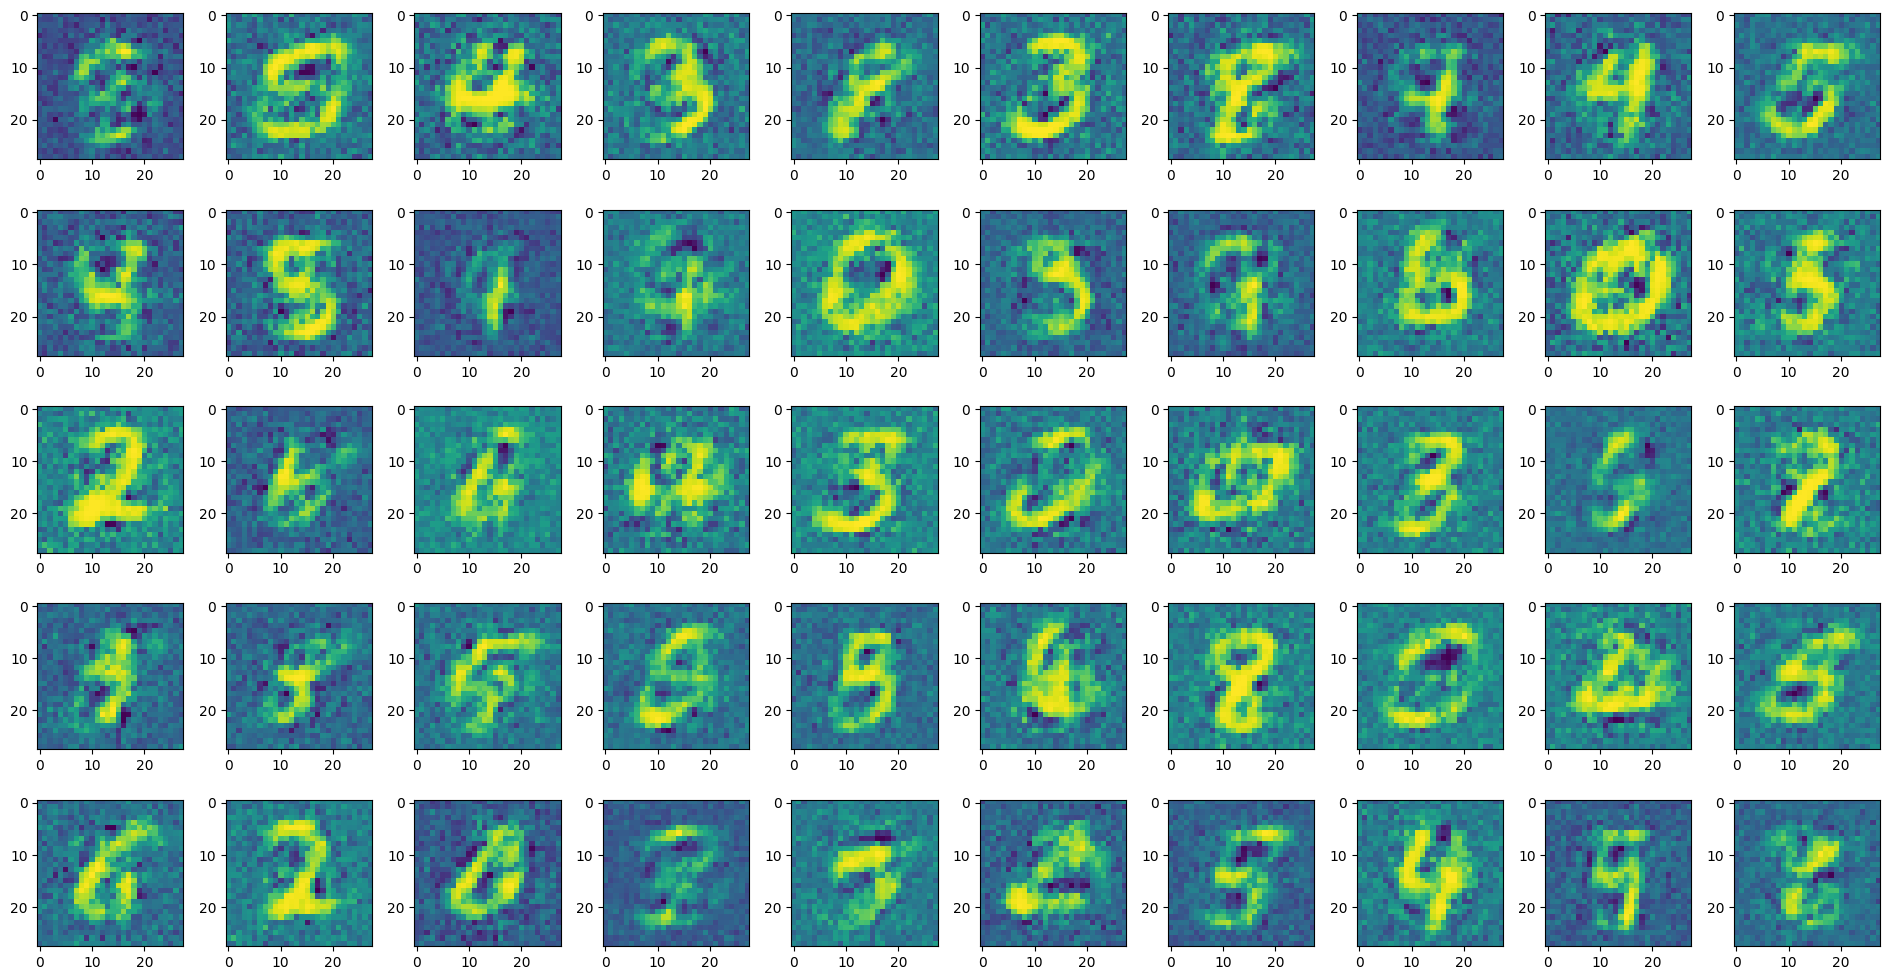

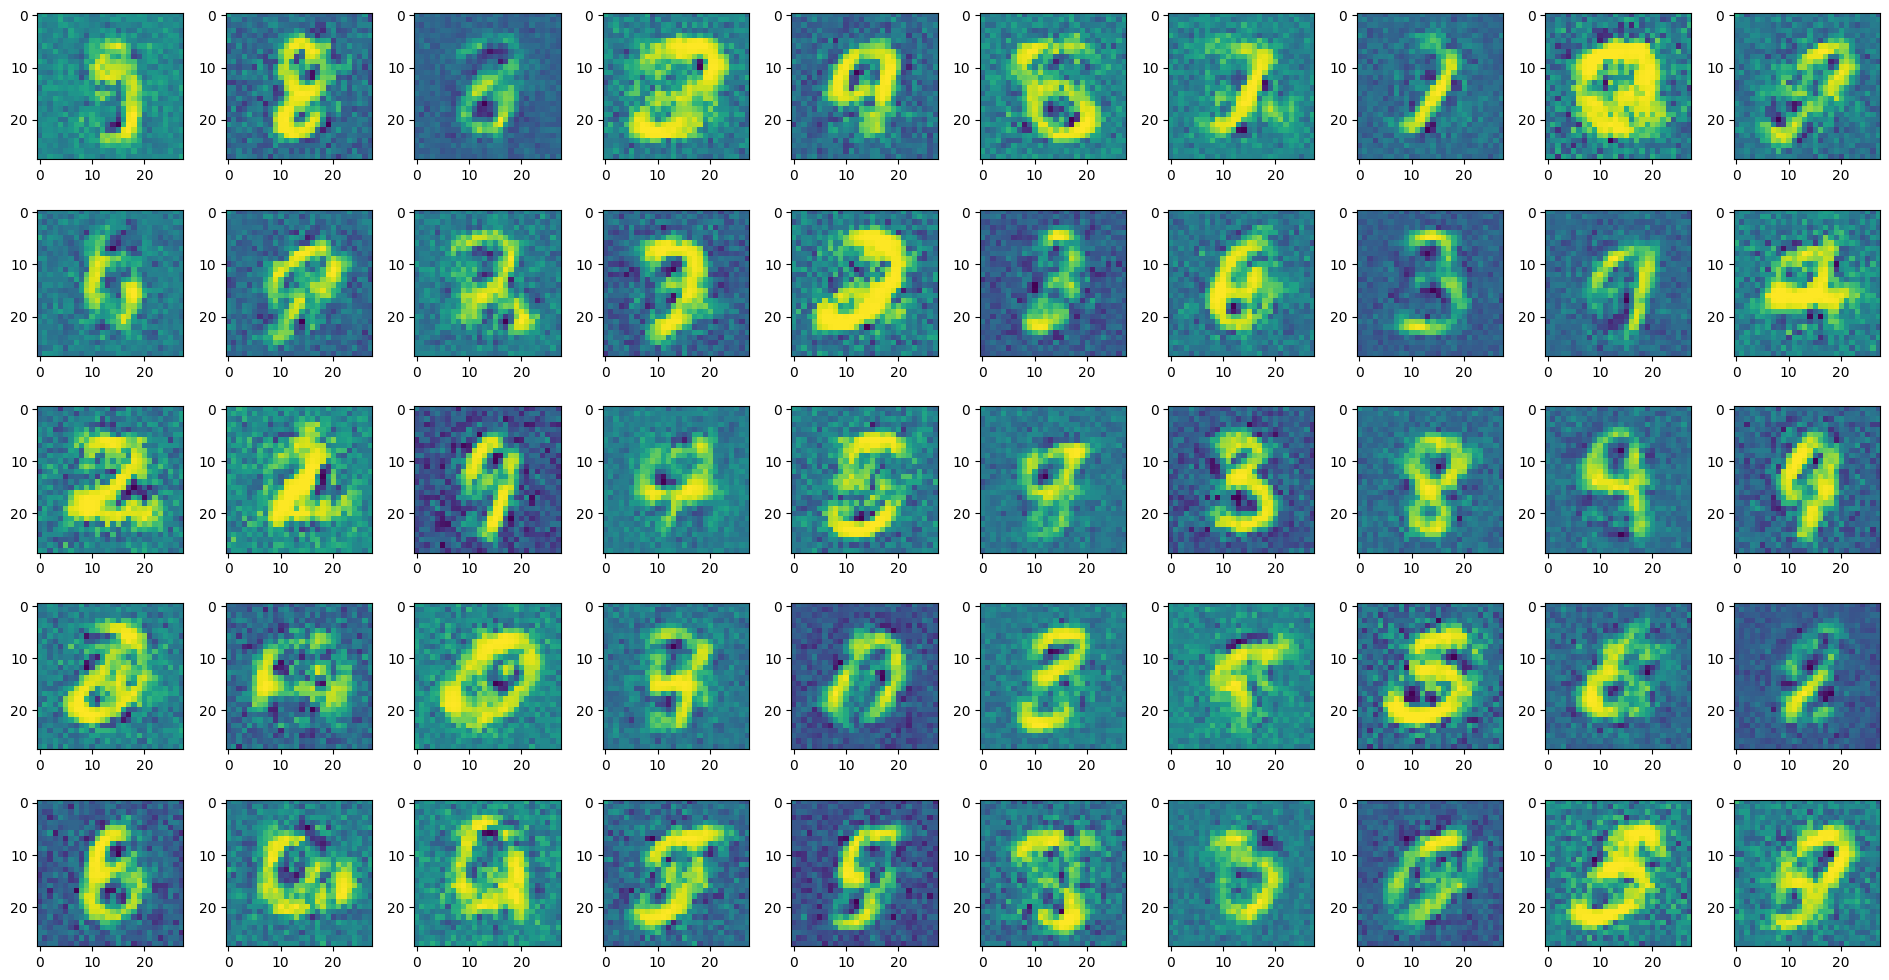

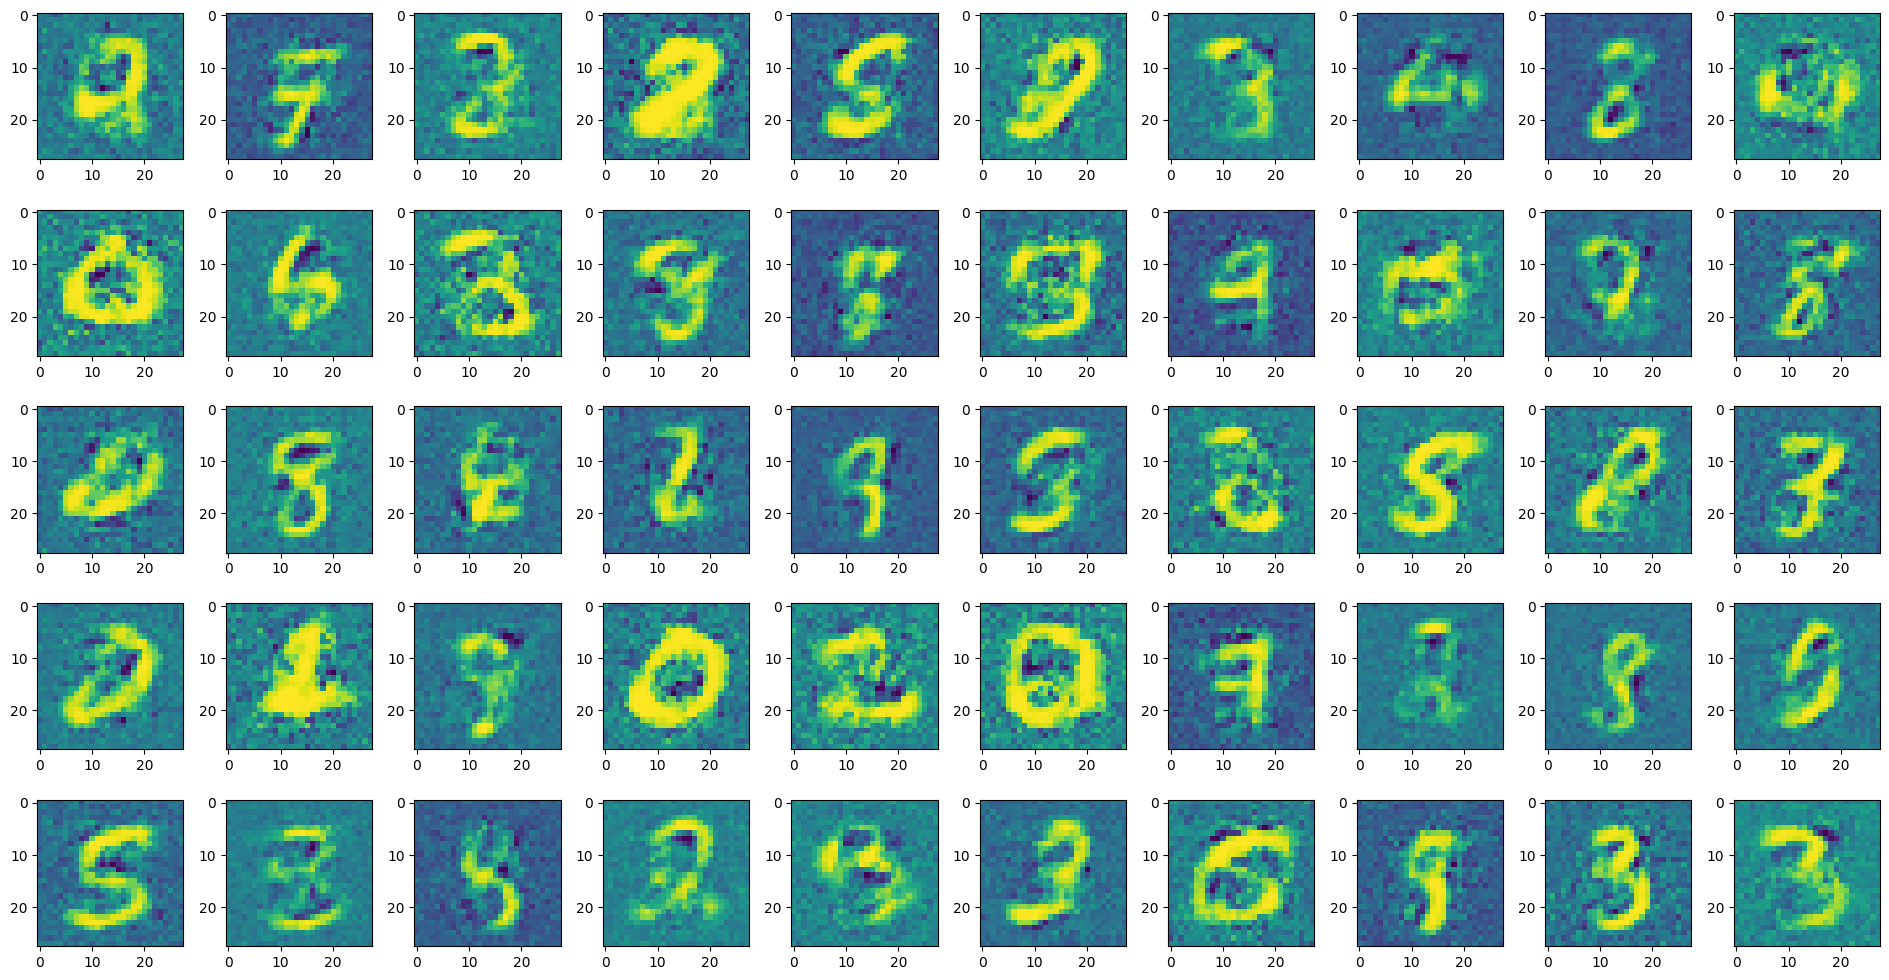

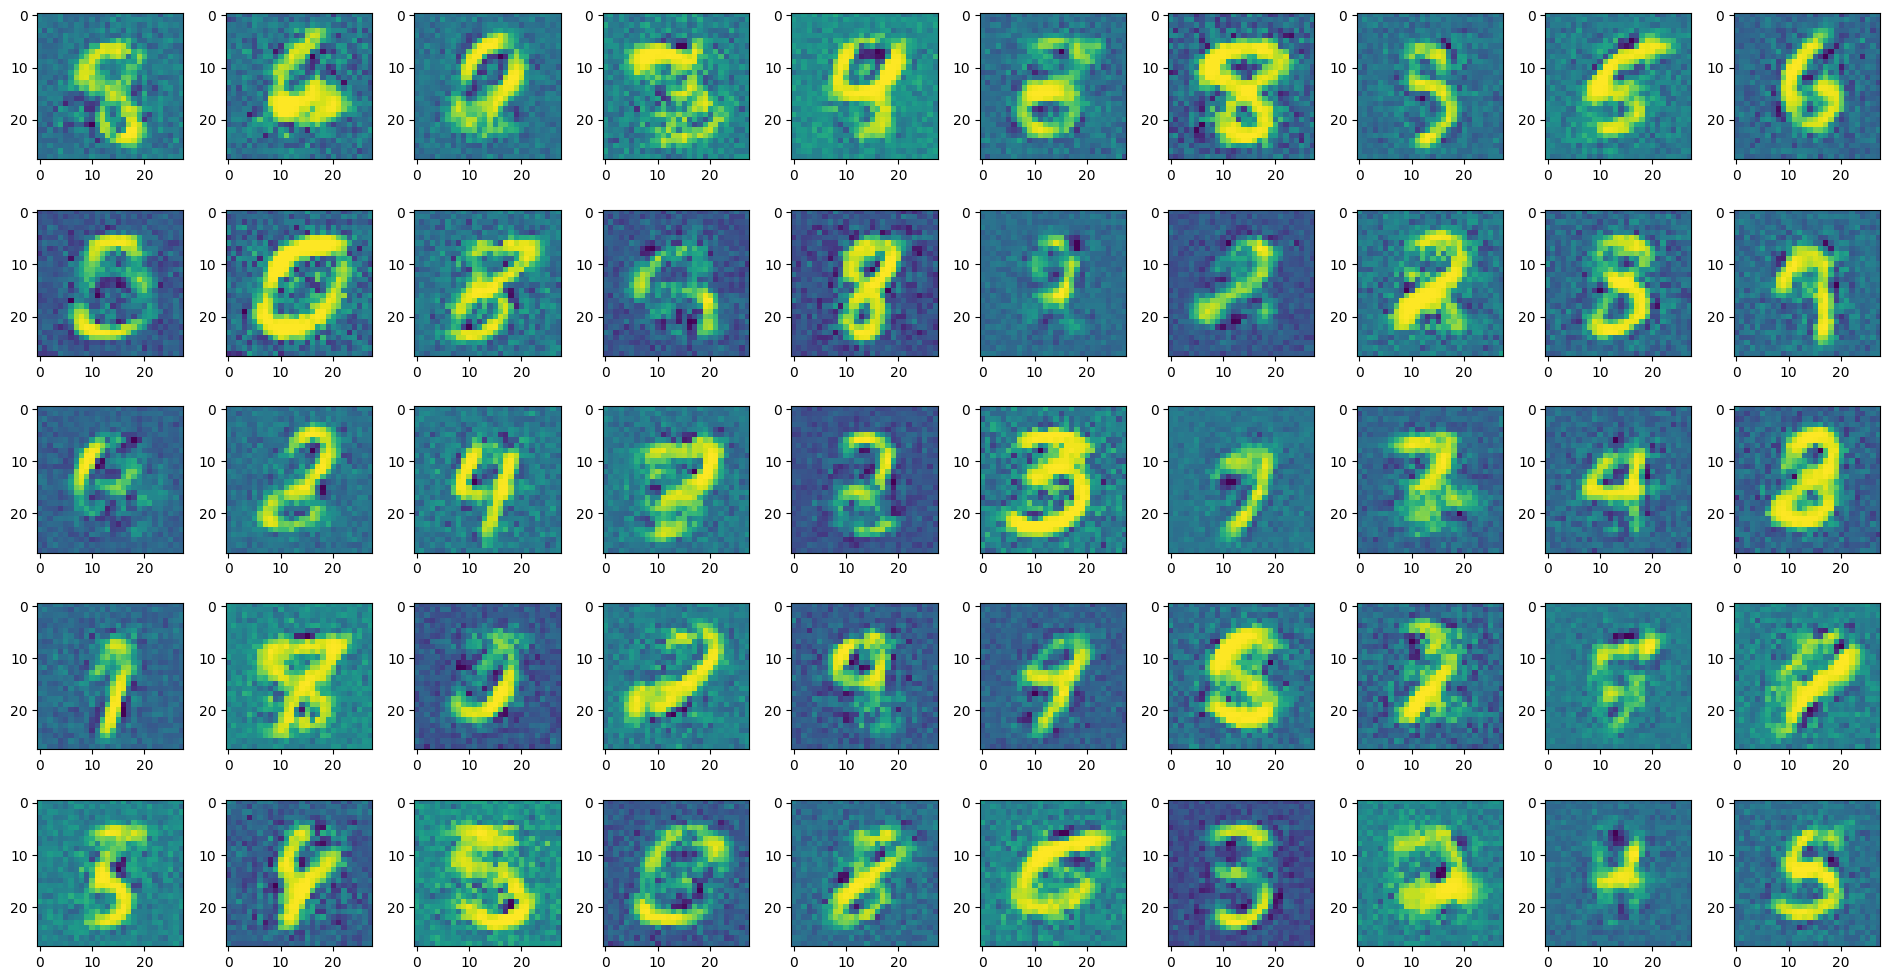

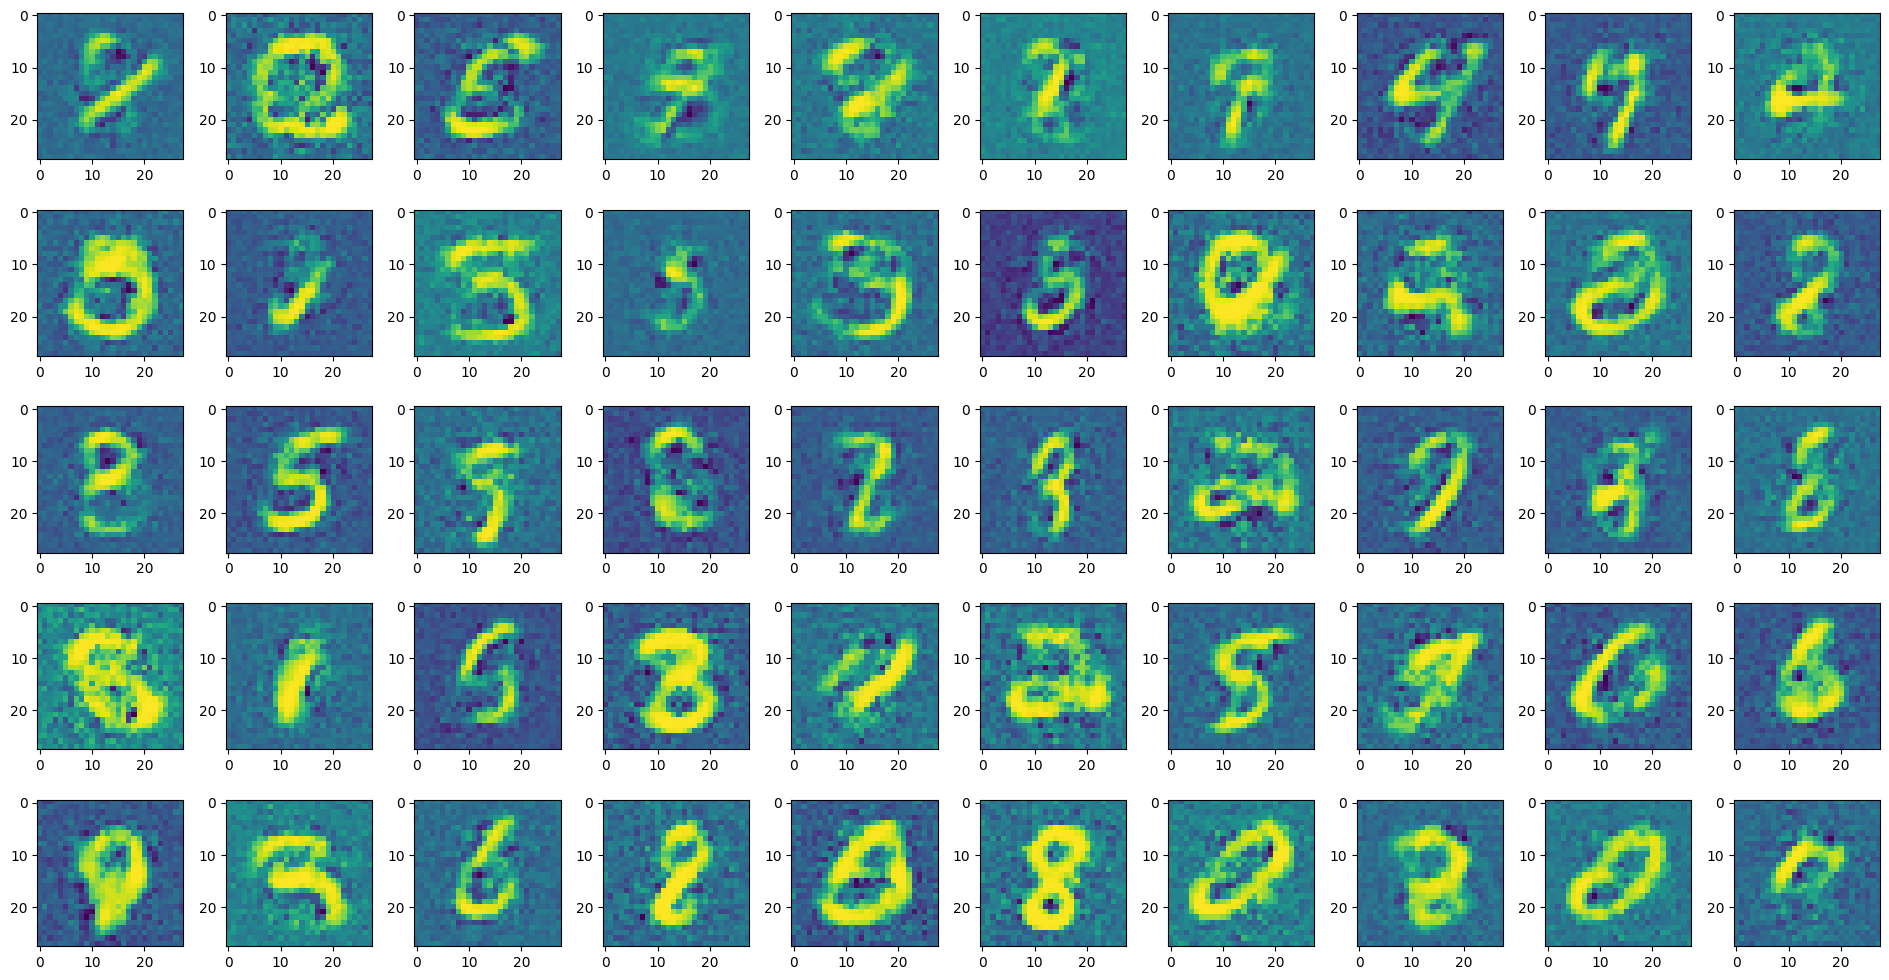

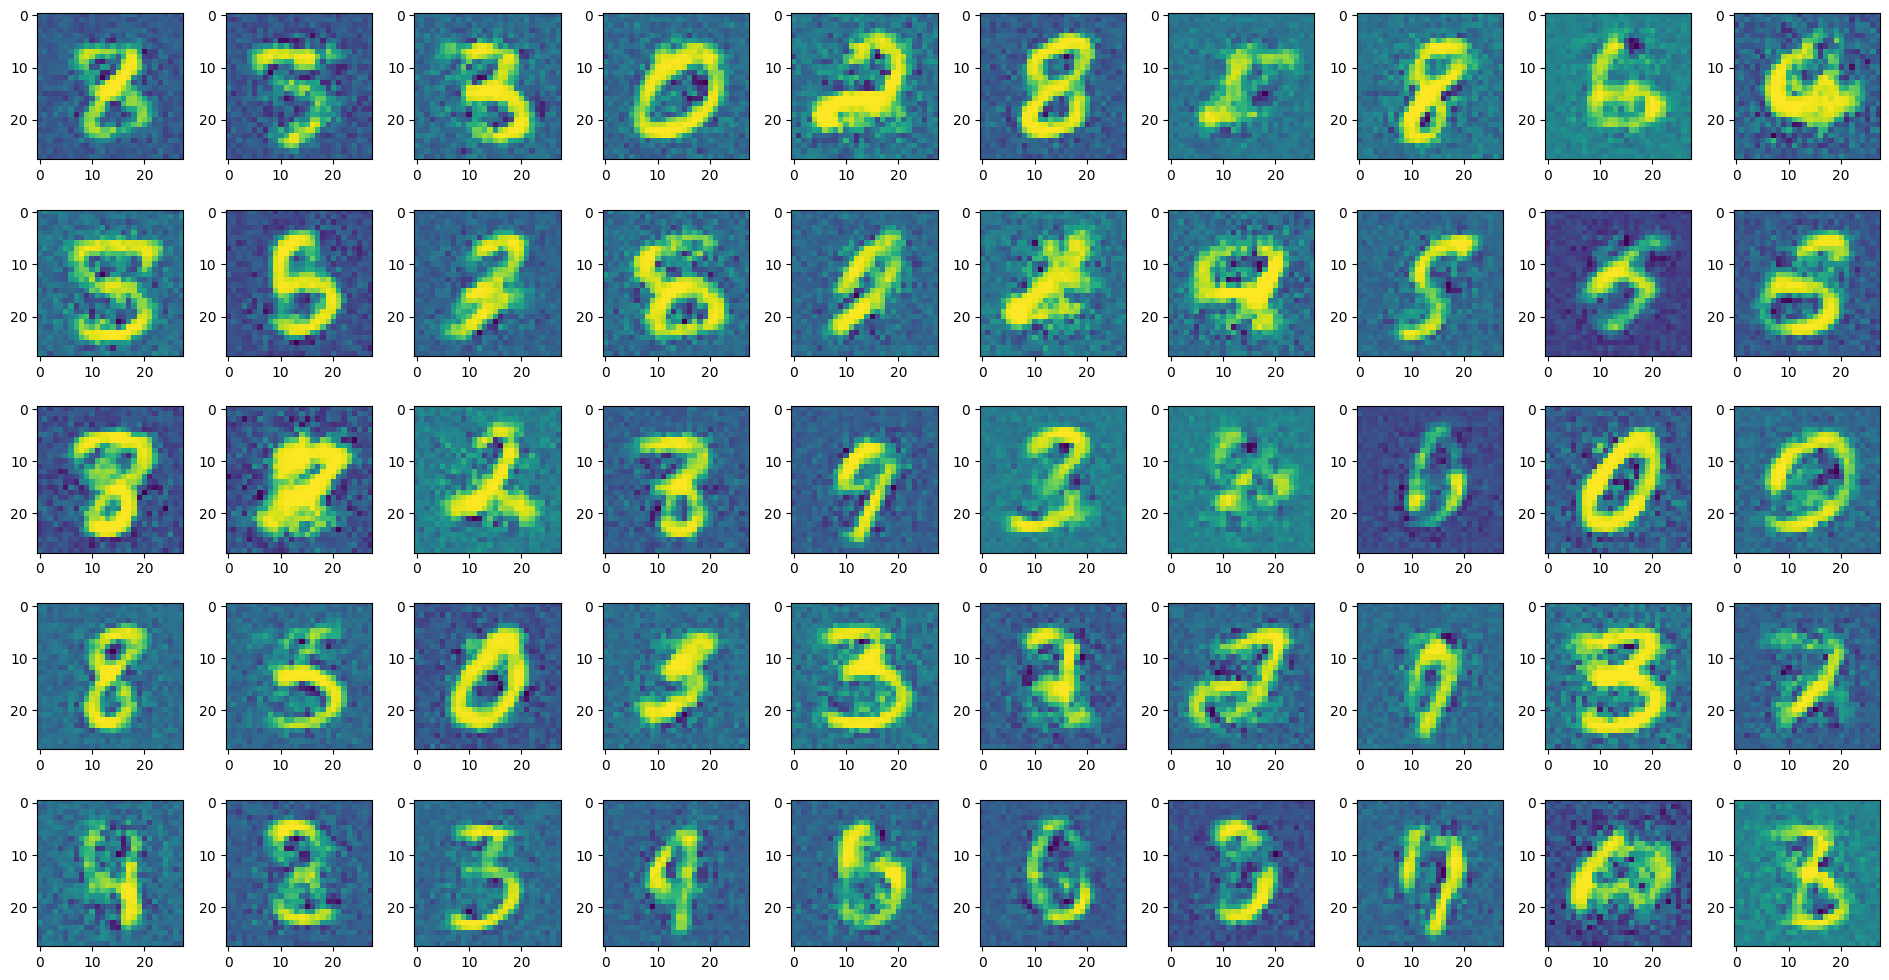

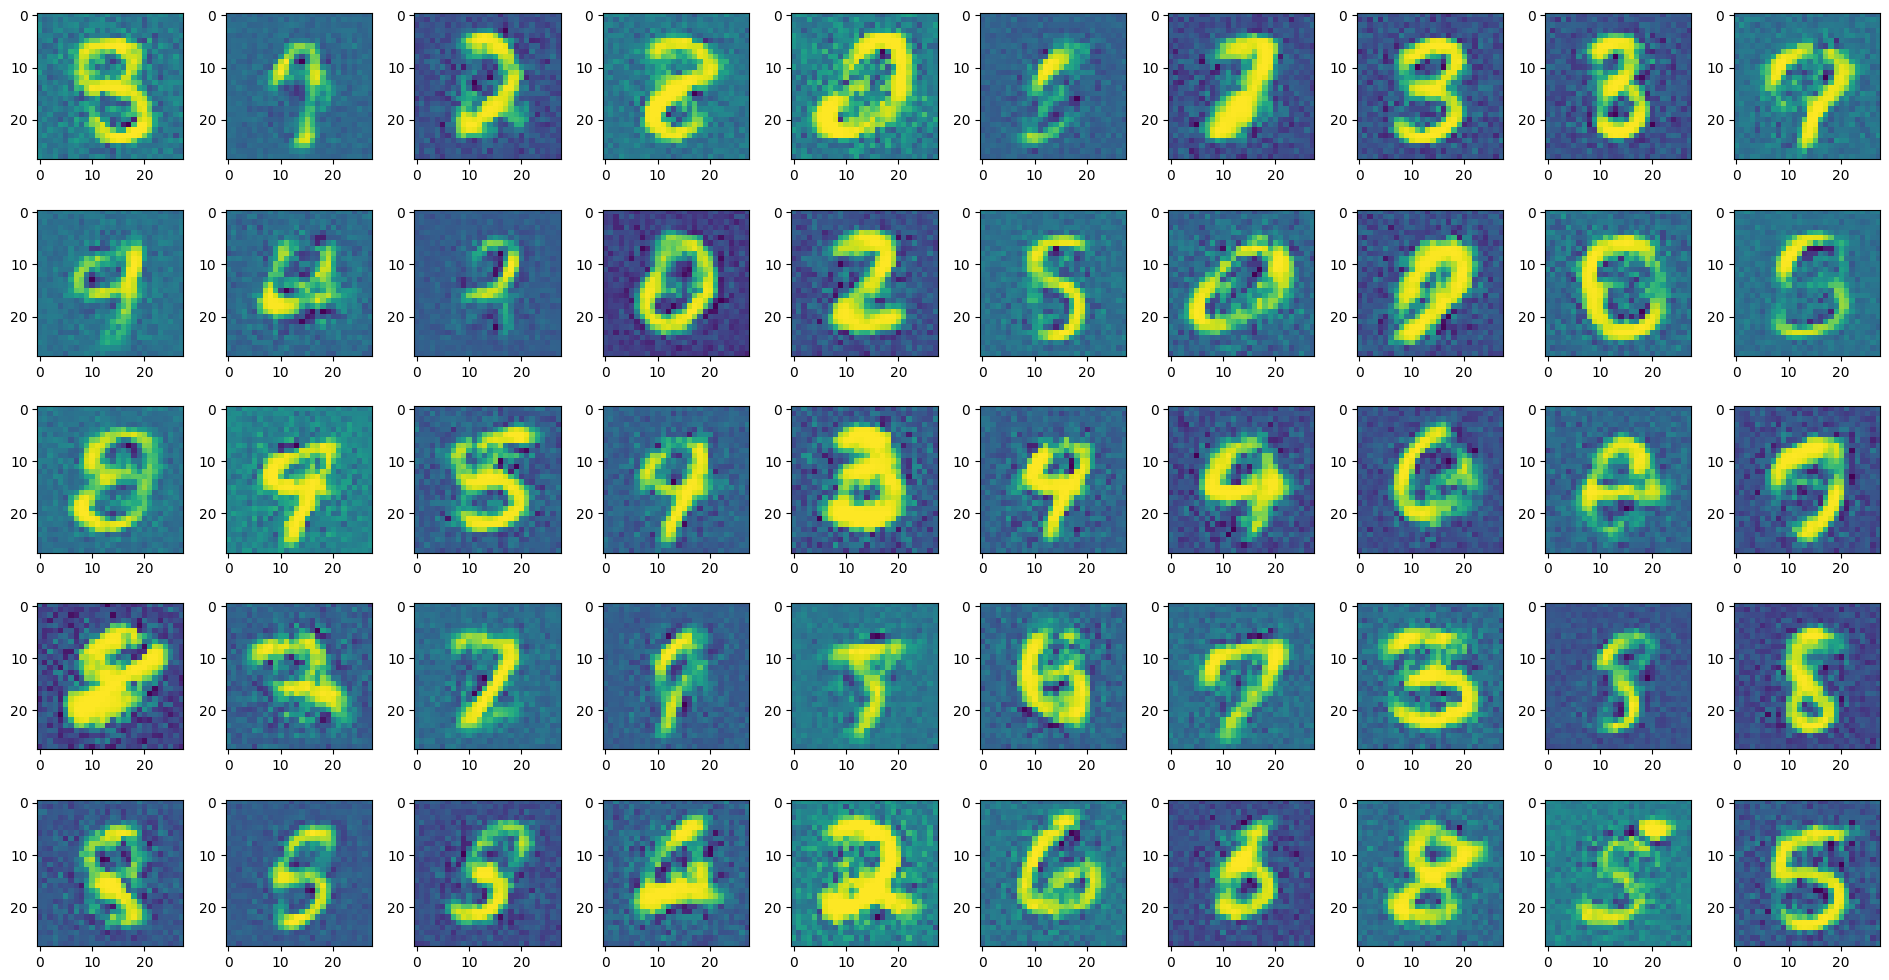

In [18]:

def generateNoiseVectors(images=128):
    vector = np.random.normal(0, 1, [images, 100])
    return vector

def generateImagesFromNoise(images=128):
    noiseVectors = generateNoiseVectors(images)
    return g.predict(noiseVectors)

def visualizeGenerator(i):
    print("Generator performance at stage",i)
    images = generateImagesFromNoise(50).reshape(50,28,28)
    plt.figure(figsize=(19,10))
    for i in range(images.shape[0]):
        plt.subplot(5, 10, i+1)
        plt.imshow(images[i], interpolation='nearest')
    plt.tight_layout()
    # plt.show()

# epochs
for i in range(100):
    # batch
    for _ in range(128):
        gImages = generateImagesFromNoise()

        actualImages = x_train[np.random.randint(
            low=0, high=x_train.shape[0], size=128)]

        actualImagesLabels = np.array(
            [0.99 for _ in range(128)])   # high for actual
        generatedImagesLabels = np.array(
            [0 for _ in range(128)])   # low for fake

        # fix generator , update descriminator
        d.trainable = True
        d.train_on_batch(np.concatenate(
            [actualImages, gImages]),
            np.concatenate([actualImagesLabels, generatedImagesLabels])
        )

        # fix descriminator , update generator with fake data
        d.trainable = False
        final.train_on_batch(generateNoiseVectors(), np.ones(128))
    if(i%10==0):
        visualizeGenerator(i)